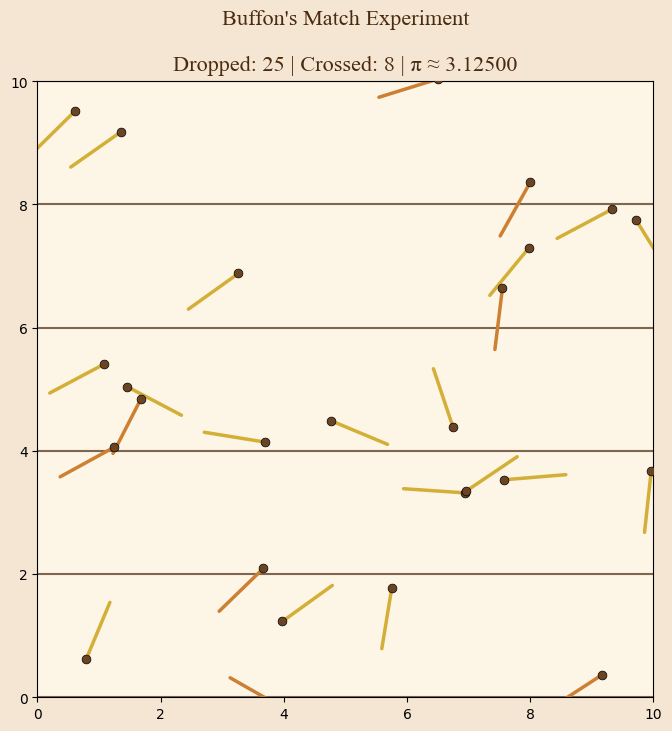

In [1]:
# importing minimal libraries.
# matplotlib package ffpeg used to generate the video
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from functools import partial


# SOME PARAMETERS THAT ARE USED:

# Parameters for the run to be decided at the start of the program.
grid_size = 10     # Size of the square grid
num_matches = 25  # Total number of matches to drop

# keeps the count of matches that intersect the parallel lines in grid
global matches_intersecting
matches_intersecting = 0


# DEFINING THE HELPER FUCNTIONS FOR buffons_matches()

# intersects_line():
# Function to check if a match intersects a line
# it checks for the mathces that intersect with the parallel grid lines.
# if they intersect, then function returns 1 otherwise it returns 0.
def intersects_line(y1, y2, D):
    return int(y1 // D) != int(y2 // D)


# animate():
# To simulate the experiment, we generated the video using ffpeg package of python.
# We generate each frame of the video as plot obtained using matplotlib.
# there is no return statement for func animate as FuncAnimation handles it.
# Animation function to add one match at a time
def animate(frame, L, D, ax): # adding new match for each required frame through this function.

    global matches_intersecting
    MatchLength = L
    Distance = D

    # what we did :
    # 1. generate the centre for the match.
    # 2. generate the angle of of match 
    # 3. find the endpoints of the match.
    # 4. plot the head of the match
    # 5. plot the match as a line betweeen 2 points 

    # Generate random center and angle for the match
    x_center = random.uniform(0, grid_size)
    y_center = random.uniform(0, grid_size)
    angle = random.uniform(0, 2 * math.pi)
    
    # Calculate endpoints of the match
    x1 = x_center - ( MatchLength/ 2) * math.cos(angle)
    y1 = y_center - ( MatchLength/ 2) * math.sin(angle)
    x2 = x_center + ( MatchLength/ 2) * math.cos(angle)
    y2 = y_center + ( MatchLength/ 2) * math.sin(angle)
    
    # Plot match head (dark brown dot)
    ax.scatter(x1, y1, color='#6b4423', s=40, zorder=3, edgecolors='black', linewidth=0.5)
    
    # Next section checks for intersection and non intersection of matches
    # and plots them in different colours

    # Check if the match intersects any parallel line
    if intersects_line(y1, y2, Distance):
        # Plot match body (brown line) #6F4E37 : coffee
        ax.plot([x1, x2], [y1, y2], color='#CD7F32', linewidth=2.5, zorder=2, solid_capstyle='round')
        matches_intersecting += 1
    else:
        # Plot match body (light yellow line)
        ax.plot([x1, x2], [y1, y2], color='#D4AF37', linewidth=2.5, zorder=2, solid_capstyle='round')

    
    # see, when we just start chucking the matches on the sheet of paper, 
    # there will be a point at which no mathces intersect the parallel lines,
    # thus, matches_intersecting = 0, it will cause a problem as its the denominator
    # and division by 0 is not allowed.
    # to fix this, we set the default value of ratio (Pie) to be 0 when no match 
    # intersect the parallel lines.
    ratio = 0
    if matches_intersecting != 0:
        # For the general case:
        # If L <= D, the probability is P = (2L)/(πD) => π ≈ (2L/D) * (N/n)
        if L <= D:
            ratio = (2 * L / D) * ((frame + 1) / matches_intersecting)
        else:
            # If L > D, using the provided formula:
            # π = (N/n)*((2L/D) - (2/D)*(sqrt(L^2 - D^2) + D*arcsin(D/L)) + 1)
            ratio = ((frame + 1) / matches_intersecting) * ((2 * L / D) - (2 / D) * (math.sqrt(L**2 - D**2) + D * math.asin(D / L)) + 1)

    # Update title with current stats
    ax.set_title(f"Buffon's Match Experiment\n\nDropped: {frame+1} | Crossed: {matches_intersecting} | π ≈ {ratio:.5f}",
                 fontsize=16, color='#4A2B0F', fontfamily='Times new Roman', pad=8)






def buffons_matches( L, d ) :

    # L: Length of the matches thatwe will be chucking on the sheet
    # D: Distance between the parallel lines on the sheet of the 

    # Creating the sheet of paper on which we will simulate the chucking of matches.
    # Wanted to make it look like an old sheet of paer so added face color, ( colour codes from documentation )
    fig = plt.figure(figsize=(8, 8), facecolor='#F5E6D3')  # Light brown paper color

    # creating only a single subplot that occupies the complete sheet of paper
    ax = fig.add_subplot(111, facecolor='#FDF5E6')  # Slightly off-white for axes background

    # Draw horizontal lines with a subtle brown color
    for i in range(0, grid_size + 1, d):
        ax.axhline(y=i, color='#4A2B0F', linewidth=1.5, alpha=0.7)  # Dark brown lines


    # both the x and y axes goes from 0 to the sixe of grid.
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')      # ensuring that the grid is square shaped
    ax.grid(False)              # Remove default grid


    # Create a partial function with preset arguments
    # had to use to addon because, the FuncAnimation function's sturucture
    # allows the second argument with only one argument which is the frame number
    animate_with_args = partial(animate, ax=ax, L=L, D=d)


    #    Create animation using FuncAnimation
    #    referred to the documentation of ffpeg, we did not know the implementation.
    #    parameters of FuncAnimation :
    #       1. fig acts like the canvas, the part which is stationary consistently among all frames.
    #       2. animate_with_args generates the unique aspect of each frame, it animates the nth match which 
    #          corresponds to the nth frame of the animation
    ani = FuncAnimation(fig, animate_with_args, frames=num_matches, interval=20)


    # Save the animation as an MP4 file using FFMpegWriter
    # chose the fps to be 10 to see each match getting generated.
    # rest parameters are the default parameters.
    writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
    ani.save("BuffonsMatchExperiment.mp4", writer=writer)

    plt.show()



# main function or execution of the program.
# call the function buffons_matches(L, D)

buffons_matches(1,2)


In [2]:
import shutil
print(shutil.which("ffmpeg"))


C:\Users\activ\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg.Essentials_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-7.1-essentials_build\bin\ffmpeg.EXE
